# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Import all necessary packages

In [1]:
import pickle
from sklearn.utils import shuffle
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from textwrap import wrap
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten

C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


---
## Step 0: Load The Data

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

# define input files
training_file = '../../GD_GitHubData/traffic-signs-data/train.p'
validation_file = '../../GD_GitHubData/traffic-signs-data/valid.p'
testing_file = '../../GD_GitHubData/traffic-signs-data/test.p'

# load inputs from input files
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# get data from inputs
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# check data consistency
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train[:,0,0,0].shape[0]

# TODO: Number of validation examples
n_validation = X_valid[:,0,0,0].shape[0]

# TODO: Number of testing examples.
n_test = X_test[:,0,0,0].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0,:,:,:].shape if (X_train[0,:,:,:].shape == X_valid[0,:,:,:].shape == X_test[0,:,:,:].shape) else []

# TODO: How many unique classes/labels there are in the dataset.
l_classes = []
n_classes = len([l_classes.append(label) for label in np.concatenate((y_train, y_valid, y_test)) if label not in l_classes])

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Random images:


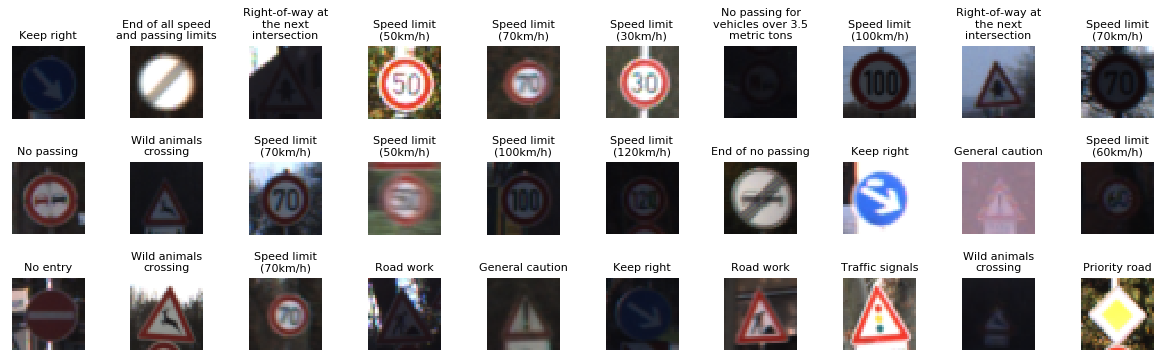

Random images of the same random label: Beware of ice/snow


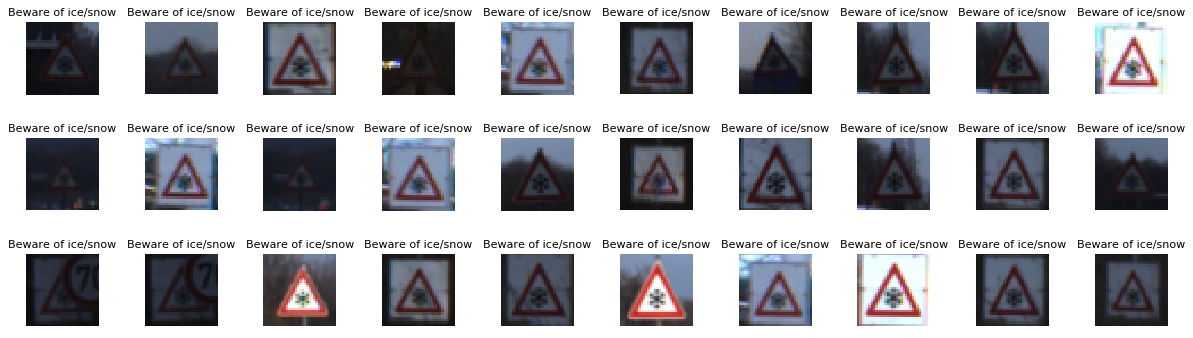

High contrast image for each label:


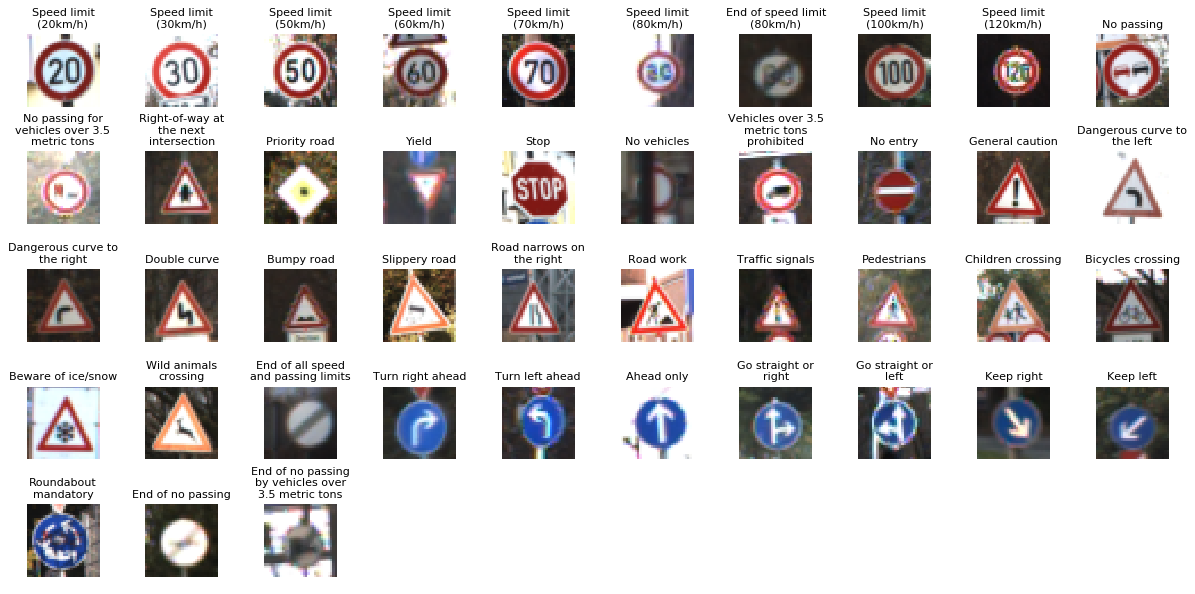

Average image for each label:


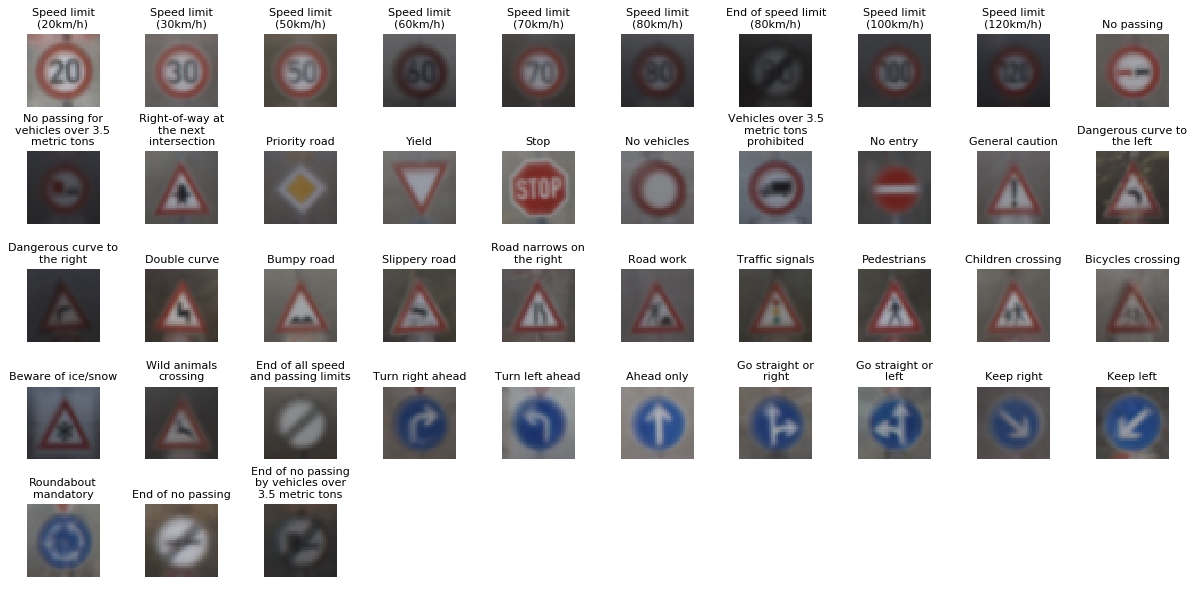

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.

# define constants
displayimages = 30

def plot_traffic_signs(images, labels, totalimages):
# ...
# This function plots a set of traffic sign images
# ...
# Inputs
# ...
# images      : list of images
# labels      : list of image labels
# totalimages : total number of images to plot
    
    # define constants
    maxhorizontalimages = 10
    dpi = 80
    horizontalimagesize = 15
    titlebasefontsize = 100
    titlechars_per_line = 18
    
    # initialize variables
    horizontalimages = min(totalimages, maxhorizontalimages)
    
    # create figure with subplot
    verticalimages = np.int(np.ceil(totalimages / horizontalimages))
    verticalimagesize = (horizontalimagesize * (verticalimages / horizontalimages))
    figure, axes = plt.subplots(verticalimages, horizontalimages, figsize=(horizontalimagesize, verticalimagesize), dpi = dpi)
    figure.tight_layout()
    # figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    axes = axes.reshape(-1)
    
    # plot all images
    titlefontsize = (titlebasefontsize / horizontalimages)
    for idx, axis in enumerate(axes):
        
        # configure axis
        axis.set_axis_off()
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
        
        # print label and plot image
        if (len(labels) > idx):
            axis.set_title("\n".join(wrap(labels[idx], titlechars_per_line)), fontsize = titlefontsize)
            axis.imshow(images[idx, :, :])
    
    # make sure plot is shown
    plt.show()

# read description of labels
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    labeldict = dict([(np.int(row['ClassId']), row['SignName']) for row in reader])

# select and plot random images
print('Random images:')
indices = np.random.randint(0, len(X_train), displayimages)
images = X_train[indices].squeeze()
labels = [labeldict[idx] for idx in y_train[indices]]
plot_traffic_signs(images, labels, displayimages)

# select and plot random images of the same random label
label = np.random.randint(min(y_train), max(y_train), 1)
print('Random images of the same random label:', labeldict[label[0]])
images = np.asarray([image for idx, image in enumerate(X_train) if (y_train[idx] == label)])
indices = np.random.randint(0, images.shape[0], displayimages)
images = images[indices, :, :]
labels = [labeldict[label[0]] for image in images]
plot_traffic_signs(images, labels, displayimages)

# select and plot a high contrast image for each label
labelnums = np.arange(min(y_train), (max(y_train) + 1))
contrastimages = []
averageimages = []
for labelnum in labelnums:
    labelimages = np.asarray([image for idx, image in enumerate(X_train) if (y_train[idx] == labelnum)])
    grays = np.asarray([cv2.cvtColor(labelimage, cv2.COLOR_RGB2GRAY) for labelimage in labelimages])
    smalls = [gray[15:18, 15:18] for gray in grays]
    deviations = np.asarray([np.sum(np.absolute(small - np.average(small))) for small in smalls])
    contrastimages.append(labelimages[np.argmax(deviations)])
    averageimages.append(np.array(np.average(labelimages, axis = 0), dtype = np.int32))
contrastimages = np.asarray(contrastimages)
averageimages = np.asarray(averageimages)
labels = [labeldict[labelnums[idx]] for idx, labelnum in enumerate(labelnums)]
print('High contrast image for each label:')
plot_traffic_signs(contrastimages, labels, len(labelnums))
print('Average image for each label:')
plot_traffic_signs(averageimages, labels, len(labelnums))

### Modify existing data to extend the database and visualize it

ToDo

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# normalize input data
X_train_norm = np.asarray(((X_train / 127.5) - 1), np.float32)
X_valid_norm = np.asarray(((X_valid / 127.5) - 1), np.float32)
X_test_norm = np.asarray(((X_test / 127.5) - 1), np.float32)

# ensure correct label data type
y_train_conv = np.asarray(y_train, np.int32)
y_valid_conv = np.asarray(y_valid, np.int32)
y_test_conv = np.asarray(y_test, np.int32)

### Model Architecture

In [41]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x, bdisplay):
# ...
# This function calculates the LeNet logits for input x
# ...
# Inputs
# ...
# x        : input image
# bdisplay : boolean for 'display information'
# ...
# Outputs
# ...
# logits : probabilities of individual classes in input image
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b
    
    # display information
    if bdisplay:
        print('Conv: shape', (5, 5, 3, 6), 'zeros', 6, 'mean', mu, 'stddev', sigma)
        print('Conv: strides', [1, 1, 1, 1], 'padding', 'VALID')
        print('Conv: inp', x)
        print('Conv: W', conv1_W)
        print('Conv: b', conv1_b)
        print('Conv: out', conv1)
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    print('Convolutional layer   1 :', [32, 32], 'input dimension with depth', 3, 'and', [28, 28], 'output dimensions with depth', 6)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    # display information
    if bdisplay:
        print('Pool: filter', [1, 2, 2, 1], 'strides', [1, 2, 2, 1], 'padding', 'VALID')
        print('Pool: inp', conv1)
        print('Pool: out', conv1)
    
    print('Pooling layer         1 :', [28, 28], 'input dimension with depth', 6, 'and', [14, 14], 'output dimensions with depth', 6)
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv2_b
    
    # display information
    if bdisplay:
        print('Conv: shape', [5, 5, 6, 16], 'zeros', 16, 'mean', mu, 'stddev', sigma)
        print('Conv: strides', [1, 1, 1, 1], 'padding', 'VALID')
        print('Conv: inp', conv1)
        print('Conv: W', conv2_W)
        print('Conv: b', conv2_b)
        print('Conv: out', conv2)
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    print('Convolutional layer   2 :', [14, 14], 'input dimension with depth', 6, 'and', [10, 10], 'output dimensions with depth', 16)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    # display information
    if bdisplay:
        print('Pool: filter', [1, 2, 2, 1], 'strides', [1, 2, 2, 1], 'padding', 'VALID')
        print('Pool: inp', conv2)
        print('Pool: out', conv2)
    
    print('Pooling layer         2 :', [10, 10], 'input dimension with depth', 16, 'and', [5, 5], 'output dimensions with depth', 16)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # display information
    if bdisplay:
        print('Full: shape', [400, 120], 'zeros', 120, 'mean', mu, 'stddev', sigma)
        print('Full: inp', fc0)
        print('Full: W', fc1_W)
        print('Full: b', fc1_b)
        print('Full: fc', fc1)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    print('Fully connected layer 1 :', 400, 'input dimensions and', 120, 'output dimensions')
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # display information
    if bdisplay:
        print('Full: shape', [120, 84], 'zeros', 84, 'mean', mu, 'stddev', sigma)
        print('Full: inp', fc1)
        print('Full: W', fc2_W)
        print('Full: b', fc2_b)
        print('Full: fc', fc2)
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    print('Fully connected layer 2 :', 120, 'input dimensions and', 84, 'output dimensions')
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    # display information
    if bdisplay:
        print('Full: shape', [84, 43], 'zeros', 43, 'mean', mu, 'stddev', sigma)
        print('Full: inp', fc2)
        print('Full: W', fc3_W)
        print('Full: b', fc3_b)
        print('Full: fc', logits)
    
    print('Fully connected layer 3 :', 84, 'input dimensions and', 43, 'output dimensions')
    
    return logits

In [13]:
def determine_outputs(input_dims, filter_size = [5, 5], strides = [1, 1], padding = 'VALID'):
# ...
# This function calculates the output dimensions of a convolutional operation
# ...
# Inputs
# ...
# input_dims  : dimensions of input (height, width)
# filter_size : size of filter [height, width]
# strides     : value of strides [height_step, width_step]
# padding     : type of padding operation {'VALID', 'SAME'}
# ...
# Outputs
# ...
# output_dims : dimensions of output (height, width)
    
    # initialize output
    output_dims = None
    
    # valid padding
    if padding == 'VALID':
        output_dims = np.array([np.ceil(float(input_dims[0] - filter_size[0] + 1) / float(strides[0])), \
                                np.ceil(float(input_dims[1] - filter_size[1] + 1) / float(strides[1]))], dtype = np.int32)
        
    # same padding
    elif padding == 'SAME':
        output_dims = np.array([np.ceil(float(input_dims[0]) / float(strides[0])), \
                                np.ceil(float(input_dims[1]) / float(strides[1]))], dtype = np.int32)
    
    # unknown padding
    else:
        output_dims = None
    
    return output_dims
    
def conv_layer(inp, input_dims, input_depth, output_depth, filter_size = [5, 5], strides = [1, 1], padding = 'VALID', mean = 0, stddev = 0.1, bdisplay = False):
# ...
# This function calculates a convolutional layer
# ...
# Inputs
# ...
# inp          : input feature map
# input_dims   : height and width dimensions of input (height, width)
# input_depth  : feature dimensions of input
# output_depth : feature dimensions of output
# filter_size  : size of filter [height, width]
# strides      : value of strides [height_step, width_step]
# padding      : type of padding operation {'VALID', 'SAME'}
# mean         : mean of random initialization
# stddev       : standard deviation of random initialization
# bdisplay     : boolean for 'display information'
# ...
# Outputs
# ...
# out         : output feature map
# output_dims : height and width dimensions of output (height, width)
    
    # calculate linear operators
    W = tf.Variable(tf.truncated_normal(shape = (filter_size[0], filter_size[1], input_depth, output_depth), mean = mean, stddev = stddev))
    b = tf.Variable(tf.zeros(output_depth))
    
    # execute convolution
    out = tf.nn.conv2d(inp, W, strides = [1, strides[0], strides[1], 1], padding = padding) + b
    
    # display information
    if bdisplay:
        print('Conv: shape', (filter_size[0], filter_size[1], input_depth, output_depth), 'zeros', output_depth, 'mean', mean, 'stddev', stddev)
        print('Conv: strides', [1, strides[0], strides[1], 1], 'padding', padding)
        print('Conv: inp', inp)
        print('Conv: W', W)
        print('Conv: b', b)
        print('Conv: out', out)
    
    return out, determine_outputs(input_dims, filter_size, strides, padding)

def maxpool(inp, input_dims, k_size = [2, 2], strides = [2, 2], padding = 'VALID', bdisplay = False):
# ...
# This function calculates a max pooling layer
# ...
# Inputs
# ...
# inp        : input feature map
# input_dims : height and width dimensions of input (height, width)
# k_size     : size of filter [height, width]
# strides    : value of strides [height_step, width_step]
# padding    : type of padding operation {'VALID', 'SAME'}
# bdisplay   : boolean for 'display information'
# ...
# Outputs
# ...
# out         : output feature map
# output_dims : height and width dimensions of output (height, width)
    
    # execute pooling
    out = tf.nn.max_pool(inp, [1, k_size[0], k_size[1], 1], [1, strides[0], strides[1], 1], padding)
    
    # display information
    if bdisplay:
        print('Pool: filter', [1, k_size[0], k_size[1], 1], 'strides', [1, strides[0], strides[1], 1], 'padding', padding)
        print('Pool: inp', inp)
        print('Pool: out', out)
    
    return out, determine_outputs(input_dims, k_size, strides, padding)

def LeNet_adjusted_complex(x, tf_keep_prob, image_shape, n_classes, bdisplay):
# ...
# This function calculates the LeNet-type logits for input x
# ...
# Inputs
# ...
# x            : input image
# tf_keep_prob : tensorflow parameter for dropout
# image_shape  : height and width dimensions of input image (height, width)
# n_classes    : number of output classes
# bdisplay     : boolean for 'display information'
# ...
# Outputs
# ...
# logits : probabilities of individual classes in input image
    
    # define constants
    mu = 0 # mean used to initialize weights with random values
    sigma = 0.1 # standard deviation used to initialize weights with random values
    padding = 'VALID' # use valid padding everywhere
    
    # define layer dimensions
    #conv_depths = np.array([12, 24, 32], dtype = np.int32)
    #filter_sizes = np.array([5, 5, 5], dtype = np.int32)
    #conv_strides = np.array([1, 1, 1], dtype = np.int32)
    #pool_sizes = np.array([2, 2, 2], dtype = np.int32)
    #pool_strides = np.array([2, 2, 2], dtype = np.int32)
    #fc_depths = np.array([800, 200, n_classes], dtype = np.int32)
    conv_depths = np.array([6, 16], dtype = np.int32)
    filter_sizes = np.array([5, 5], dtype = np.int32)
    conv_strides = np.array([1, 1], dtype = np.int32)
    pool_sizes = np.array([2, 2], dtype = np.int32)
    pool_strides = np.array([2, 2], dtype = np.int32)
    fc_depths = np.array([120, 84, n_classes], dtype = np.int32)
    
    # initialize convolution layer results
    convs = []
    conv_dims = []
    
    # execute all convolution layers
    for idx, conv_depth in enumerate(conv_depths):
        
        # define input feature map and dimensions for first layer
        if (idx == 0):
            inp = x
            input_shape = np.asarray(image_shape, dtype = np.int32)
            input_dims = input_shape[:2]
            input_depth = input_shape[2]           
        
        # define input feature map and dimensions for every other layer
        else:
            inp = convs[idx - 1]
            input_dims = conv_dims[idx - 1]
            input_depth = conv_depths[idx - 1]
        
        # execute convolutional layer
        conv, conv_dim = conv_layer(inp, input_dims, input_depth, conv_depth, filter_size = [filter_sizes[idx], filter_sizes[idx]], strides = [conv_strides[idx], conv_strides[idx]], padding = padding, mean = mu, stddev = sigma, bdisplay = bdisplay)
        
        # execute activation and drop out
        conv = tf.nn.relu(conv)
        conv = tf.nn.dropout(conv, tf_keep_prob)
    
        print('Convolutional layer  ', (idx + 1), ':', input_dims, 'input dimension with depth', input_depth, 'and', conv_dim, 'output dimensions with depth', conv_depth)
        
        # execute pooling
        if (pool_sizes[idx] > 0):
            pool, pool_dim = maxpool(conv, conv_dim, k_size = [pool_sizes[idx], pool_sizes[idx]], strides = [pool_strides[idx], pool_strides[idx]], padding = padding, bdisplay = bdisplay)
            print('Pooling layer        ', (idx + 1), ':', conv_dim, 'input dimension with depth', conv_depth, 'and', pool_dim, 'output dimensions with depth', conv_depth)
        else:
            pool, pool_dim = conv, conv_dim
        
        # save results
        convs.append(pool)
        conv_dims.append(pool_dim)
    
    # initialize fully connected layer results
    fcs = []
    fc_dims = []
    
    # execute all fully connected layers
    for idx, fc_depth in enumerate(fc_depths):
        
        # define input feature map and dimensions for first layer
        if (idx == 0):
            inp = flatten(convs[-1])
            input_depth = (conv_dims[-1][0] * conv_dims[-1][1] * conv_depths[-1])
        
        # define input feature map and dimensions for every other layer
        else:
            inp = fcs[idx - 1]
            input_depth = fc_dims[idx - 1]
        
        # calculate linear operators
        W = tf.Variable(tf.truncated_normal(shape = (input_depth, fc_depths[idx]), mean = mu, stddev = sigma))
        b = tf.Variable(tf.zeros(fc_depths[idx]))
        
        # execute fully connected layer
        fc = tf.matmul(inp, W[-1]) + b[-1]
        
        # display information
        if bdisplay:
            print('Full: shape', (input_depth, fc_depths[idx]), 'zeros', fc_depths[idx], 'mean', mu, 'stddev', sigma)
            print('Full: inp', inp)
            print('Full: W', W)
            print('Full: b', b)
            print('Full: fc', fc)
        
        # execute activation and drop out
        fc = tf.nn.relu(fc)
        fc = tf.nn.dropout(fc, tf_keep_prob)
        
        print('Fully connected layer', (idx + 1), ':', input_depth, 'input dimensions and', fc_depths[idx], 'output dimensions')
        
        # save results
        fcs.append(fc)
        fc_dims.append(fc_depths[idx])
    
    # retrieve result
    logits = fcs[-1]
    
    return logits

In [45]:
def determine_outputs(input_dims, filter_size = [5, 5], strides = [1, 1], padding = 'VALID'):
# ...
# This function calculates the output dimensions of a convolutional operation
# ...
# Inputs
# ...
# input_dims  : dimensions of input (height, width)
# filter_size : size of filter [height, width]
# strides     : value of strides [height_step, width_step]
# padding     : type of padding operation {'VALID', 'SAME'}
# ...
# Outputs
# ...
# output_dims : dimensions of output (height, width)
    
    # initialize output
    output_dims = None
    
    # valid padding
    if padding == 'VALID':
        output_dims = np.array([np.ceil(float(input_dims[0] - filter_size[0] + 1) / float(strides[0])), \
                                np.ceil(float(input_dims[1] - filter_size[1] + 1) / float(strides[1]))], dtype = np.int32)
        
    # same padding
    elif padding == 'SAME':
        output_dims = np.array([np.ceil(float(input_dims[0]) / float(strides[0])), \
                                np.ceil(float(input_dims[1]) / float(strides[1]))], dtype = np.int32)
    
    # unknown padding
    else:
        output_dims = None
    
    return output_dims
    
def LeNet_adjusted(x, tf_keep_prob, image_shape, n_classes, bdisplay):
# ...
# This function calculates the LeNet-type logits for input x
# ...
# Inputs
# ...
# x            : input image
# tf_keep_prob : tensorflow parameter for dropout
# image_shape  : height and width dimensions of input image (height, width)
# n_classes    : number of output classes
# bdisplay     : boolean for 'display information'
# ...
# Outputs
# ...
# logits : probabilities of individual classes in input image
    
    # define constants
    mu = 0 # mean used to initialize weights with random values
    sigma = 0.1 # standard deviation used to initialize weights with random values
    padding = 'VALID' # use valid padding everywhere
    
    # define layer dimensions
    #conv_depths = np.array([12, 24, 32], dtype = np.int32)
    #filter_sizes = np.array([5, 5, 5], dtype = np.int32)
    #conv_strides = np.array([1, 1, 1], dtype = np.int32)
    #pool_sizes = np.array([2, 2, 2], dtype = np.int32)
    #pool_strides = np.array([2, 2, 2], dtype = np.int32)
    #fc_depths = np.array([800, 200, n_classes], dtype = np.int32)
    conv_depths = np.array([6, 16], dtype = np.int32)
    filter_sizes = np.array([5, 5], dtype = np.int32)
    conv_strides = np.array([1, 1], dtype = np.int32)
    pool_sizes = np.array([2, 2], dtype = np.int32)
    pool_strides = np.array([2, 2], dtype = np.int32)
    fc_depths = np.array([120, 84, n_classes], dtype = np.int32)
    
    # initialize convolution layer variables and results
    W_conv = []
    b_conv = []
    convs = []
    conv_dims = []
    
    # execute all convolution layers
    for idx, conv_depth in enumerate(conv_depths):
        
        # define input feature map and dimensions for first layer
        if (idx == 0):
            inp = x
            input_shape = np.asarray(image_shape, dtype = np.int32)
            input_dims = input_shape[:2]
            input_depth = input_shape[2]           
        
        # define input feature map and dimensions for every other layer
        else:
            inp = convs[idx - 1]
            input_dims = conv_dims[idx - 1]
            input_depth = conv_depths[idx - 1]
        
        # calculate layer parameters
        filter_size = (filter_sizes[idx], filter_sizes[idx], input_depth, conv_depth)
        conv_strides = [1, conv_strides[idx], conv_strides[idx], 1]
        k_size = [1, pool_sizes[idx], pool_sizes[idx], 1]
        pool_strides = [1, pool_strides[idx], pool_strides[idx], 1]
        
        # calculate linear operators
        W_conv.append(tf.Variable(tf.truncated_normal(shape = filter_size, mean = mu, stddev = sigma)))
        b_conv.append(tf.Variable(tf.zeros(conv_depth)))
        
        # execute convolution
        convs.append(tf.nn.conv2d(inp, W_conv[idx], strides = conv_strides, padding = padding) + b_conv[idx])
        conv_dim = (determine_outputs(input_dims, filter_size[0:2], conv_strides[1:3], padding))
        conv_dims.append(conv_dim)
        
        # display information
        if bdisplay:
            print('Conv: shape', filter_size, 'zeros', conv_depth, 'mean', mu, 'stddev', sigma)
            print('Conv: strides', conv_strides, 'padding', padding)
            print('Conv: inp', inp)
            print('Conv: W', W_conv[idx])
            print('Conv: b', b_conv[idx])
            print('Conv: out', convs[idx])
        
        # execute activation and drop out
        convs[idx] = tf.nn.relu(convs[idx])
        convs[idx] = tf.nn.dropout(convs[idx], tf_keep_prob)
    
        print('Convolutional layer  ', (idx + 1), ':', input_dims, 'input dimension with depth', input_depth, 'and', conv_dim, 'output dimensions with depth', conv_depth)
        
        # execute pooling if necessary
        if (pool_sizes[idx] > 0):
            
            # execute pooling
            pool_inp = convs[idx]
            convs[idx] = tf.nn.max_pool(pool_inp, k_size, pool_strides, padding)
            conv_dims[idx] = determine_outputs(conv_dim, k_size[1:3], pool_strides[1:3], padding)
            
            # display information
            if bdisplay:
                print('Pool: filter', k_size, 'strides', pool_strides, 'padding', padding)
                print('Pool: inp', pool_inp)
                print('Pool: out', convs[idx])
            
            print('Pooling layer        ', (idx + 1), ':', conv_dim, 'input dimension with depth', conv_depth, 'and', conv_dims[idx], 'output dimensions with depth', conv_depth)
    
    # initialize fully connected layer variables and results
    W_fc = []
    b_fc = []
    fcs = []
    fc_dims = []
    
    # execute all fully connected layers
    for idx, fc_depth in enumerate(fc_depths):
        
        # define input feature map and dimensions for first layer
        if (idx == 0):
            inp = flatten(convs[-1])
            input_depth = (conv_dims[-1][0] * conv_dims[-1][1] * conv_depths[-1])
        
        # define input feature map and dimensions for every other layer
        else:
            inp = fcs[idx - 1]
            input_depth = fc_dims[idx - 1]
        
        # calculate linear operators
        W_fc.append(tf.Variable(tf.truncated_normal(shape = (input_depth, fc_depths[idx]), mean = mu, stddev = sigma)))
        b_fc.append(tf.Variable(tf.zeros(fc_depths[idx])))
        
        # execute fully connected layer
        fcs.append(tf.matmul(inp, W_fc[idx]) + b_fc[idx])
        fc_dims.append(fc_depths[idx])
        
        # display information
        if bdisplay:
            print('Full: shape', (input_depth, fc_depths[idx]), 'zeros', fc_depths[idx], 'mean', mu, 'stddev', sigma)
            print('Full: inp', inp)
            print('Full: W', W_fc[idx])
            print('Full: b', b_fc[idx])
            print('Full: fc', fcs[idx])
        
        # execute activation and drop out
        fcs[idx] = tf.nn.relu(fcs[idx])
        fcs[idx] = tf.nn.dropout(fcs[idx], tf_keep_prob)
        
        print('Fully connected layer', (idx + 1), ':', input_depth, 'input dimensions and', fc_depths[idx], 'output dimensions')
        
    # retrieve result
    logits = fcs[idx]
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [55]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Use DROPOUT etc. to not overfit !!!

# define constants
bdisplay = False
#epochs = 20
epochs = 10
#batch_size = 256
batch_size = 128
rate = 0.001
#keep_prob = 0.5
keep_prob = 1

# define tensorflow parameters
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name = 'x')
y = tf.placeholder(tf.int32, (None), name = 'y')
tf_keep_prob = tf.placeholder(tf.float32, (None), name = 'tf_keep_prob')

# initialize saver object
saver = tf.train.Saver()

In [56]:
### define pipelines

# forward propagation
one_hot_y = tf.one_hot(y, n_classes)
logits_orig = LeNet(x, bdisplay)
logits_adjusted_complex = LeNet_adjusted(x, tf_keep_prob, image_shape, n_classes, bdisplay)
logits_adjusted = LeNet_adjusted(x, tf_keep_prob, image_shape, n_classes, bdisplay)
logits = logits_orig

# training (backpropagation)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Convolutional layer   1 : [32, 32] input dimension with depth 3 and [28, 28] output dimensions with depth 6
Pooling layer         1 : [28, 28] input dimension with depth 6 and [14, 14] output dimensions with depth 6
Convolutional layer   2 : [14, 14] input dimension with depth 6 and [10, 10] output dimensions with depth 16
Pooling layer         2 : [10, 10] input dimension with depth 16 and [5, 5] output dimensions with depth 16
Fully connected layer 1 : 400 input dimensions and 120 output dimensions
Fully connected layer 2 : 120 input dimensions and 84 output dimensions
Fully connected layer 3 : 84 input dimensions and 43 output dimensions
Convolutional layer   1 : [32 32] input dimension with depth 3 and [28 28] output dimensions with depth 6
Pooling layer         1 : [28 28] input dimension with depth 6 and [14 14] output dimensions with depth 6
Convolutional layer   2 : [14 14] input dimension with depth 6 and [10 10] output dimensions with depth 16
Pooling layer         2 : [10 10

In [65]:
def evaluate(session, X_data, y_data, batch_size):
# ...
# This function plots a set of traffic sign images
# ...
# Inputs
# ...
# session    : tensorflow session
# X_data     : feature list
# y_data     : label list
# batch_size : batch size
# ...
# Outputs
# ...
# relative_accuracy : relative accuracy
    
    # create session object
    session = tf.get_default_session()
    
    # initialize output
    total_accuracy = 0
    
    # initial calculations
    num_examples = len(X_data)
    
    # for all batches do
    for offset in range(0, num_examples, batch_size):
        
        # define current batch 
        batch_x, batch_y = X_data[offset:(offset + batch_size)], y_data[offset:(offset + batch_size)]
        
        # calculate accuracy
        accuracy = session.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, tf_keep_prob: keep_prob})
        
        # increment total accuracy
        total_accuracy += (accuracy * len(batch_x))
    
    # calculate output
    relative_accuracy = total_accuracy / num_examples
    
    return relative_accuracy

In [58]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # display message
    print("Training...")
    
    # iterate over all epochs
    for idx in range(epochs):
        
        # shuffle training data in each epoch
        X_train_norm, y_train_conv = shuffle(X_train_norm, y_train_conv)
        
        # iterate over all batches
        for offset in range(0, n_train, batch_size):
            
            # get current batch training set
            end = offset + batch_size
            batch_x, batch_y = X_train_norm[offset:end], y_train_conv[offset:end]
            
            # execute training operation
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, tf_keep_prob: keep_prob})
        
        # validate accuracy current of epoch
        validation_accuracy = evaluate(sess, X_valid_norm, y_valid_conv, batch_size)
        
        # display validation accuracy of current epoch
        print("EPOCH {:4d}:".format(idx + 1), "Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    # save training result
    saver.save(sess, '../../GD_GitHubData/temp_data/tsclass')
    
    # display message
    print("Model saved")

Training...
EPOCH    1: Validation Accuracy = 0.777
EPOCH    2: Validation Accuracy = 0.852
EPOCH    3: Validation Accuracy = 0.874
EPOCH    4: Validation Accuracy = 0.876
EPOCH    5: Validation Accuracy = 0.900
EPOCH    6: Validation Accuracy = 0.908
EPOCH    7: Validation Accuracy = 0.885
EPOCH    8: Validation Accuracy = 0.912
EPOCH    9: Validation Accuracy = 0.906
EPOCH   10: Validation Accuracy = 0.925
Model saved


In [ ]:
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [66]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('../../GD_GitHubData/temp_data'))

    test_accuracy = evaluate(sess, X_test_norm, y_test_conv, batch_size)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ../../GD_GitHubData/temp_data\tsclass


FailedPreconditionError: Attempting to use uninitialized value Variable_330
	 [[Node: Variable_330/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable_330)]]
	 [[Node: Mean_19/_1029 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_98_Mean_19", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Variable_330/read', defined at:
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\asyncio\base_events.py", line 1425, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\asyncio\events.py", line 127, in _run
    self._callback(*self._args)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-86a6f7ecdc30>", line 5, in <module>
    logits_orig = LeNet(x, bdisplay)
  File "<ipython-input-41-175a396833c8>", line 22, in LeNet
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6), mean = mu, stddev = sigma))
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tensorflow\python\ops\variables.py", line 259, in __init__
    constraint=constraint)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tensorflow\python\ops\variables.py", line 422, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tensorflow\python\ops\array_ops.py", line 79, in identity
    return gen_array_ops.identity(input, name=name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3887, in identity
    "Identity", input=input, name=name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_GPU\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_330
	 [[Node: Variable_330/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable_330)]]
	 [[Node: Mean_19/_1029 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_98_Mean_19", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")